In [1]:
import pandas as pd
import numpy as np

In [94]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [96]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [98]:
df=df[['v1', 'v2']]

In [7]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [100]:
df.rename(columns={'v1':'labels','v2':'message'},inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8488\3498084002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'v1':'labels','v2':'message'},inplace=True)


In [102]:
df

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [104]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['labels']=le.fit_transform(df['labels'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_8488\195369416.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['labels']=le.fit_transform(df['labels'])


In [106]:
df

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [108]:
df.duplicated().sum()

403

In [110]:
df=df.drop_duplicates(keep='first')

In [112]:
df.duplicated().sum()

0

In [114]:
df.shape

(5169, 2)

In [16]:
import matplotlib.pyplot as plt

<Axes: ylabel='count'>

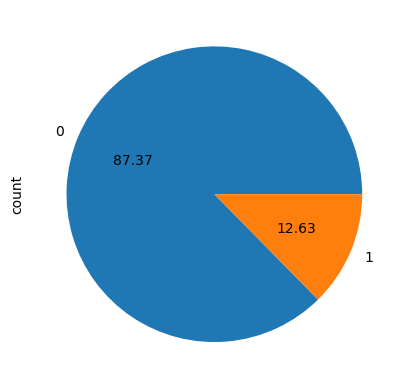

In [17]:
df['labels'].value_counts().plot(kind='pie',autopct='%0.2f')           # data is imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
df['num_char']=df['message'].apply(len)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8488\3958568453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']=df['message'].apply(len)


In [120]:
df

,labels,message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [122]:
df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_8488\565581447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [123]:
df

,labels,message,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [126]:
df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_8488\2540258180.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [128]:
df

,labels,message,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [26]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['labels']==0][['num_char','num_words','num_sentences']].describe()    #ham

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['labels']==1][['num_char','num_words','num_sentences']].describe()    #spam

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_char', ylabel='Count'>

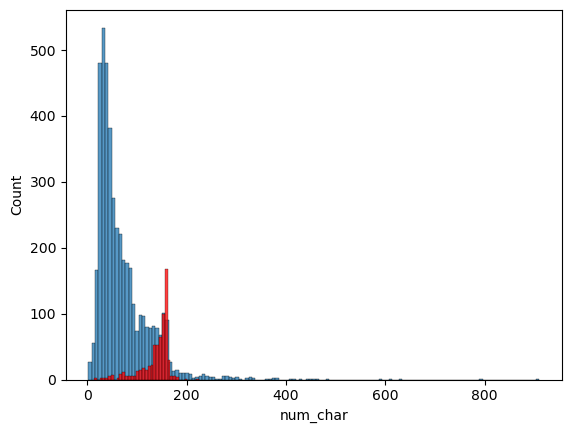

In [30]:
sns.histplot(df[df['labels']==0]['num_char'])
sns.histplot(df[df['labels']==1]['num_char'],color='red')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

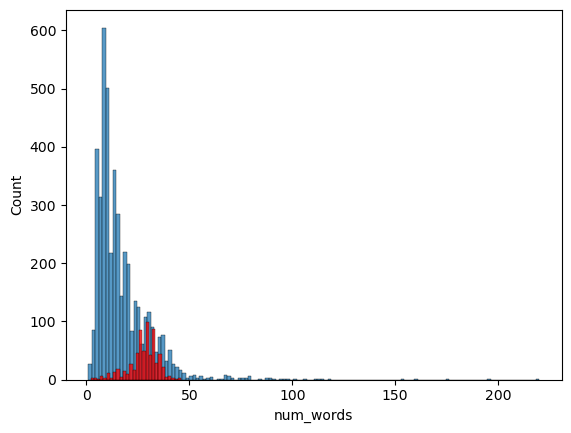

In [31]:
sns.histplot(df[df['labels']==0]['num_words'])
sns.histplot(df[df['labels']==1]['num_words'],color='red')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


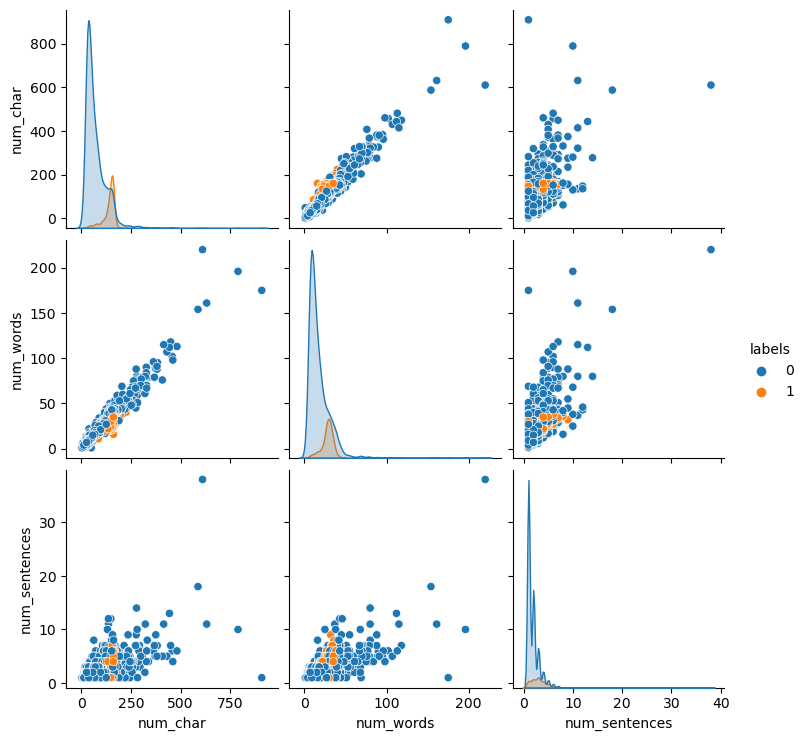

In [32]:
sns.pairplot(df,hue='labels')

<Axes: >

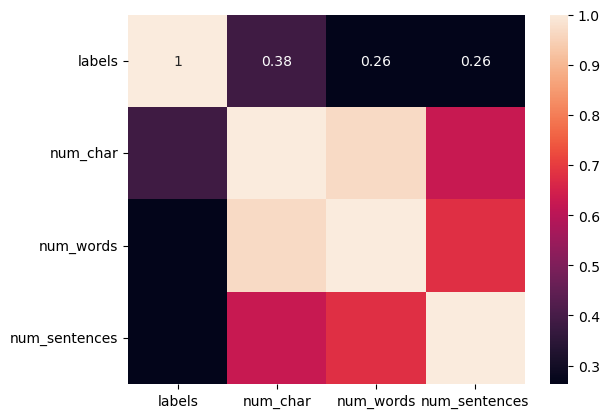

In [33]:
sns.heatmap(df[['labels','num_char','num_words','num_sentences']].corr(),annot=True)

In [248]:
def trasform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    return " ".join(y)

In [250]:
df['mess_transformed']=df['message'].apply(trasform_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8488\1500687104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mess_transformed']=df['message'].apply(trasform_text)


In [244]:
df=df[['labels','message','num_char','num_words','num_sentences','mess_transformed']]

In [252]:
df

,labels,message,num_char,num_words,num_sentences,mess_transformed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tried 2 contact u pound prize 2 claim...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b going esplanade fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,pity mood suggestions
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitching acted like interested buying some...


In [254]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [258]:
spam_wc=wc.generate(df[df['labels']==1]['mess_transformed'].str.cat(sep=" "))

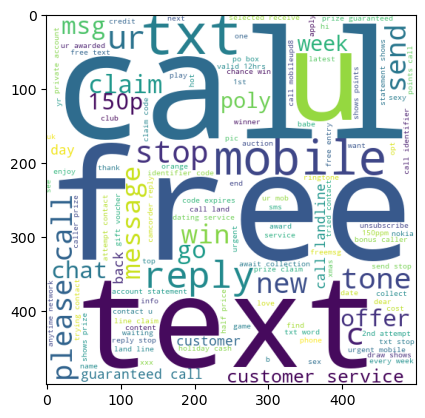

In [262]:
plt.imshow(spam_wc)

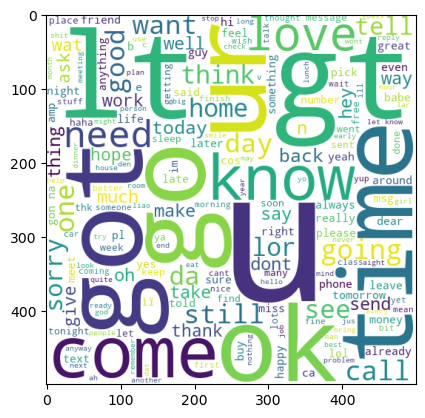

In [266]:
ham_wc=wc.generate(df[df['labels']==0]['mess_transformed'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [272]:
spam_corpus=[]
for msg in df[df['labels']==1]['mess_transformed'].to_list():
    for word in msg.split():
        spam_corpus.append(word)
        

In [276]:
len(spam_corpus)

9939

In [284]:
from collections import Counter
most_occ_spam_corpus=pd.DataFrame(Counter(spam_corpus).most_common(30))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'u'),
  Text(5, 0, 'ur'),
  Text(6, 0, 'mobile'),
  Text(7, 0, 'text'),
  Text(8, 0, 'stop'),
  Text(9, 0, '4'),
  Text(10, 0, 'claim'),
  Text(11, 0, 'reply'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'send'),
  Text(16, 0, 'urgent'),
  Text(17, 0, 'nokia'),
  Text(18, 0, 'cash'),
  Text(19, 0, 'contact'),
  Text(20, 0, 'please'),
  Text(21, 0, 'service'),
  Text(22, 0, 'win'),
  Text(23, 0, 'c'),
  Text(24, 0, 'phone'),
  Text(25, 0, 'guaranteed'),
  Text(26, 0, 'per'),
  Text(27, 0, 'week'),
  Text(28, 0, 'customer'),
  Text(29, 0, 'tone')])

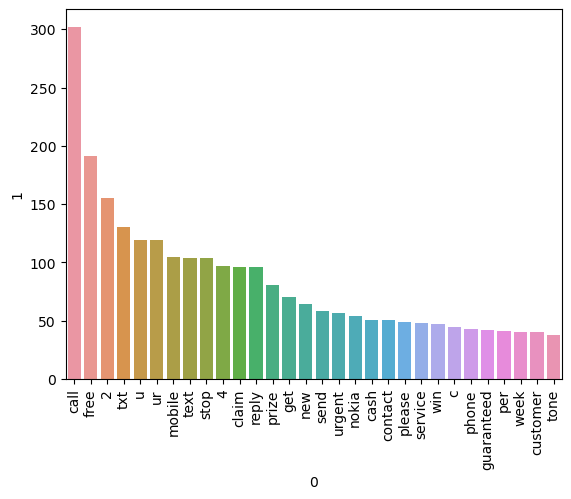

In [290]:
sns.barplot(x=most_occ_spam_corpus[0],y=most_occ_spam_corpus[1])
plt.xticks(rotation='vertical')

# Model Building

In [340]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [344]:
X=cv.fit_transform(df['mess_transformed']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [346]:
X_tf=tfidf.fit_transform(df['mess_transformed']).toarray()
X_tf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [348]:
print(X.shape)
print(X_tf.shape)

(5169, 8002)
(5169, 8002)


In [300]:
Y=df['labels'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [304]:
from sklearn.model_selection import train_test_split

In [316]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.80,random_state=100)

In [350]:
x0_train,x0_test,y0_train,y0_test=train_test_split(X_tf,Y,train_size=0.80,random_state=100)

In [308]:
from sklearn.naive_bayes import BernoulliNB,CategoricalNB,ComplementNB,GaussianNB,MultinomialNB

In [326]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [310]:
gnb=GaussianNB()
bnb=BernoulliNB()
mnb=MultinomialNB()

In [328]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[785 118]
 [ 17 114]]
0.49137931034482757


In [352]:
gnb.fit(x0_train,y_train)
y_pred01=gnb.predict(x0_test)
print(accuracy_score(y_test,y_pred01))
print(confusion_matrix(y_test,y_pred01))
print(precision_score(y_test,y_pred01))

0.8694390715667312
[[786 117]
 [ 18 113]]
0.49130434782608695


In [334]:
bnb.fit(x_train,y_train)
y_pred2=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[899   4]
 [ 22 109]]
0.9646017699115044


In [354]:
bnb.fit(x0_train,y_train)
y_pred02=bnb.predict(x0_test)
print(accuracy_score(y_test,y_pred02))
print(confusion_matrix(y_test,y_pred02))
print(precision_score(y_test,y_pred02))

0.9748549323017408
[[899   4]
 [ 22 109]]
0.9646017699115044


In [336]:
mnb.fit(x_train,y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9777562862669246
[[888  15]
 [  8 123]]
0.8913043478260869


In [356]:
mnb.fit(x0_train,y_train)
y_pred03=mnb.predict(x0_test)
print(accuracy_score(y_test,y_pred03))
print(confusion_matrix(y_test,y_pred03))
print(precision_score(y_test,y_pred03))

0.9680851063829787
[[903   0]
 [ 33  98]]
1.0


In [ ]:
1.LogisticRegression
2.DecicionTree
3.Knn
4.svm
5.nb
6.votingclassifier
7.baggingclassifier
8.randomforest
9.extratreeclassfier
10.adabostclassifier
11.gradientbostclassifier
12.xgboost
13.stacking